Setting up a fancy stylesheet

In [1]:
from IPython.core.display import HTML
css_file = 'style.css'
HTML(open(css_file, 'r').read())

Setting up the required python &#8482; environment

In [2]:
import numpy as np
from scipy.stats import bayes_mvs
from math import factorial
import scikits.bootstrap as bs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#from scipy import mean
#from scipy.stats import chi2_contingency, ranksums, bayes_mvs, ttest_ind, ranksums
from warnings import filterwarnings

%matplotlib inline
sns.set_style('whitegrid') # Setting up default plot displays
sns.set_context('paper', font_scale = 2.0, rc = {'lines.linewidth': 1.5, 'figure.figsize' : (10, 8)})
filterwarnings('ignore')

# Becoming more familiar with your data

## Importing the dataset

In [3]:
data = pd.read_csv('MOOC_Mock.csv') # Importing the csv file and attaching it to the computer variable (object) arbitrarily called data

## Examining the dataset

In [4]:
data.head(3) # A quick view of the header columns (variables) and the first few rows

,File,Age,Gender,Delay,Stay,ICU,RVD,CD4,HR,Temp,CRP,WCC,HB,Rupture,Histo,Comp,MASS
0,1,38,Female,3,6,No,No,NaN,97,35.2,NaN,10.49,10.4,No,Yes,Yes,5
1,2,32,Male,6,10,No,Yes,57,109,38.8,45.3,7.08,19.8,No,No,Yes,8
2,3,19,Female,1,16,No,No,NaN,120,36.3,10.7,13.00,8.7,No,No,No,3


<p>Your first order of business is to get a feel for the data thereby becoming familiar with the data types and the individual variables.</p>
<p>We note that the first column has no column name.  It is simply an index column used to number the rows i.e., with the first row indicated as row *0* and the second row indicated as row *1* and so on.</p>
<p>Then we have a **File** column.  This represents the file names we attached to each individual record beforehand.  Remember we want to protect subject confidentiality and we can keep a seperate and secret record of what filename is attached to which subject.</p>
<p>Next is **Age**.  This should not be a true reflection of the patients' age, but must include some code, i.e., adding an arbitrary number to each.  Clearly, the data is a ratio (numerical) type and continuous.</p>
<p>Next up is **Gender**.  Strictly speaking, this was done by mistake.  We should have chosen a code for *male* and *female* such as *5* and *8*, once again to protect patient confidentiality.  Truth be told, if someone got hold of our data, they have a 50% chance of working this one out, so a more elaborate code should be used.  A variety of characters or numbers can be chosen for male and female, thereby confusing the spies!  In any event, this is of type nominal-categorical (and binomial).</p>
<p>**Delay**, **Stay**, **CD4**, **HR**, **Temp**, **CRP**, **WCC**, and **HB** all represent ratio, numerical and continuous data types.</p>
<p>**ICU**, **RVD**, **Rupture**, **Histo**, and **Comp** are all nominal type categorical variables, and **MASS** is an ordinal type categorical variable.</p>
<p>Previously, we've looked at Age, Delay, and Stay, so let's look at some of the rest.</p>

### Gender

In [5]:
data['Gender'].value_counts()

Male      94
Female    56
Name: Gender, dtype: int64

<p>To count how many times an entry occurs we use the *.value_counts()* function.  It works for all categorical data types.  We note that we have *94* males and *56* females.</p>

### ICU, RVD, Rupture, Histo, and Comp

In [6]:
data['ICU'].value_counts()

No     136
Yes     14
Name: ICU, dtype: int64

In [7]:
data['RVD'].value_counts()

No     96
Yes    54
Name: RVD, dtype: int64

In [8]:
data['Rupture'].value_counts()

No     90
Yes    60
Name: Rupture, dtype: int64

In [9]:
data['Histo'].value_counts()

Yes    120
No      30
Name: Histo, dtype: int64

In [10]:
data['Comp'].value_counts()

No     80
Yes    70
Name: Comp, dtype: int64

## A visual look at your data

<p>In many cases a dataset is simply too large for you to start seeing patterns, or for that matter, even understanding your data.  Human beings are simply not designed to see results when staring at reems and reems of data values.<p>
<p>Some excellent tools can thus be used to visualise such data. These include *histograms*, *boxplots* (or better still, *violin plots*), and *kernel density estimates*.</p>

### Back to *Age*

<p>We've looked at *Age* using the *.describe()* function, so we know the mean and standard deviation, however a picture is worth a 1000 words.</p>

#### Boxplot

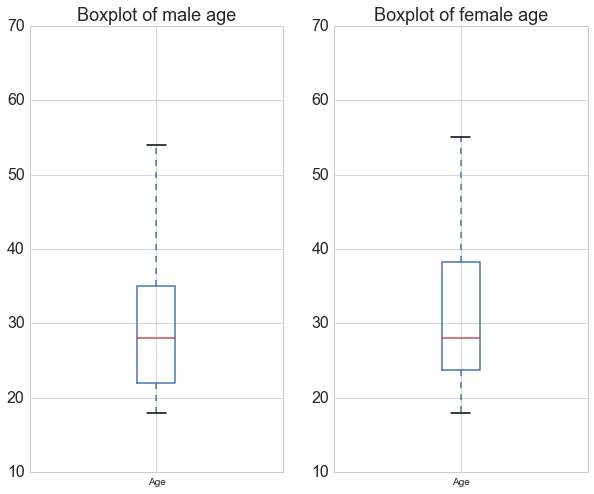

In [11]:
plt.subplot(1, 2, 1)
plt.title('Boxplot of male age', fontsize = 18)
data[data['Gender'] == 'Male'].boxplot(column = 'Age');
plt.subplot(1, 2, 2)
plt.title('Boxplot of female age', fontsize = 18)
data[data['Gender'] == 'Female'].boxplot(column = 'Age');

<p>There are quite a few things to consider here.  Let's start with the code.  My wish was to construct a boxplot for *males* and *females* individually.  For this I have to get the software to extract the **Age** values for the two genders seperately.  This is done by using some logic.  *data[data['Gender'] == 'Male']* is the correct syntax.  It says: take the data DataFrame, look inside the gender column and only consider the rows for which *Male* appears as the entry.  The double equal signs is an operator, not an assignment.  It asks the question: Is the entry *Male*? It will only extract the **Age** value if the statements is *True*.  The *.boxplot()* draws, you guessed it, a boxplot.  It takes an argument and that is the column name to be used in the analysis, in this case **Age**.</p>
<p>As represented, the boxplot itself shows a red line, which is the median.  The upper and lower margins of the blue box represents the 25th and 75th percentiles. The *whiskers*, that is the top and bottom black lines, and the end of the vertical dotted lines, represent the edges beyond which lie statistical outliers (*1.5* times the interquartile range).  The boxplot gives us a good indication of the actual data.</p>

#### Kernel density estimate

<p>Now, let us the kernel density estimate (kde).  It combines a histogram and then draws a smooth curve showing us the spread of our data.  Beautiful for when we want to see if our sample data has a normal distribution.</p>

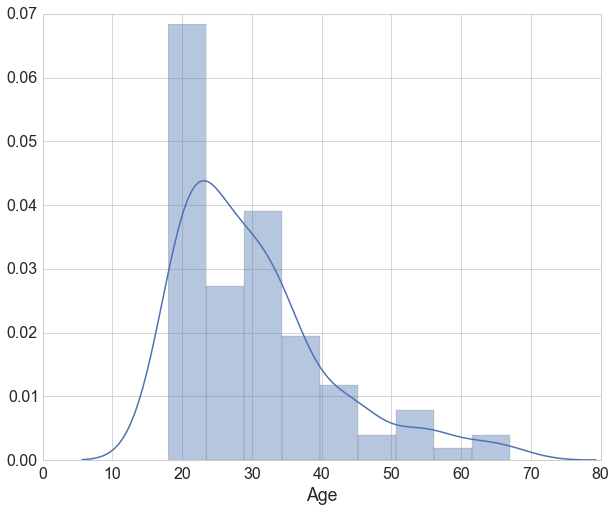

In [13]:
sns.distplot(male['Age']);

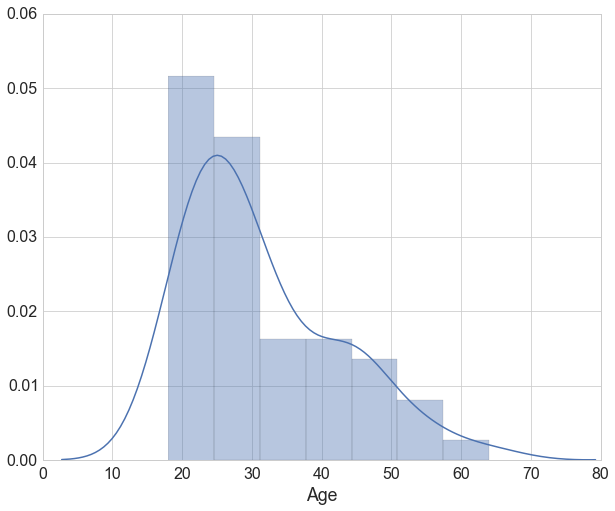

In [14]:
sns.distplot(female['Age']);

There are more arguments to the function than I've used here.  By default we have *kde = True* and *hist = True*.  These can be set to *False*.  You can also set the *bins =* value.